In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import pandas as pd
import numpy as np
import cv2
from IPython.display import display
import matplotlib.pyplot as plt
import PIL.Image as Image

TRAIN_PATH = '/home/meheraj/Develop/mnist/data/train.csv'
TEST_PATH = '/home/meheraj/Develop/mnist/data/test.csv'

train_df = pd.read_csv(TRAIN_PATH)
val_df = pd.read_csv(TEST_PATH)

In [2]:
train_data = []
for i in range(train_df.shape[0]):
    img = train_df.loc[i].values[1:].reshape(28, 28).astype(np.uint8)
    label = train_df.loc[i].values[0]
    train_data.append([img, label])

val_data = []
for i in range(val_df.shape[0]):
    img = val_df.loc[i].values[:].reshape(28, 28).astype(np.uint8)
    val_data.append([img, label])
# img = train_df.loc[14].values[1:].reshape(28, 28).astype(np.uint8)


In [9]:
class simpleNN(nn.Module):
    def __init__(self):
        super(simpleNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.fc1 = nn.Linear(64 * 7 * 7, 784)
        self.fc2 = nn.Linear(784, 98)
        self.fc3 = nn.Linear(98, 10)
        self.dropout = nn.Dropout(0.2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # x = x.view(-1, 28*28)
        x = x.unsqueeze(1)  # Add channel dimension
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.softmax(x)
        return x

In [ ]:
from torch.optim import Adam
model = simpleNN()
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()   
EPOCHS = 30
BATCH_SIZE = 32
for epoch in range(EPOCHS):
    np.random.shuffle(train_data)
    for i in range(0, len(train_data), BATCH_SIZE):
        batch = train_data[i:i+BATCH_SIZE]
        imgs = np.array([item[0] for item in batch])
        labels = np.array([item[1] for item in batch])
        imgs = torch.tensor(imgs).float()
        labels = torch.tensor(labels).long()
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item()}')

Epoch 1/30, Loss: 2.395749807357788
Epoch 2/30, Loss: 2.336150646209717
Epoch 3/30, Loss: 2.336150646209717
Epoch 4/30, Loss: 2.398650646209717
Epoch 5/30, Loss: 2.3203022480010986
Epoch 6/30, Loss: 2.273650646209717
Epoch 7/30, Loss: 2.4453022480010986
Epoch 8/30, Loss: 2.332965850830078
Epoch 9/30, Loss: 2.194378614425659
Epoch 10/30, Loss: 2.395465612411499
Epoch 11/30, Loss: 2.211150646209717


Predicted 3


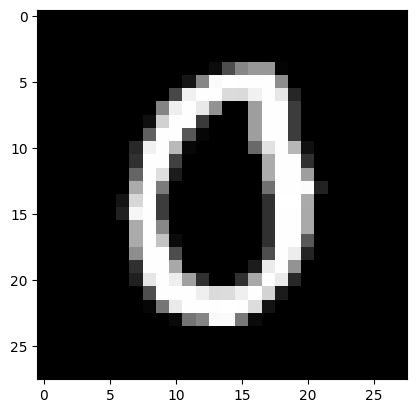

In [55]:
model.eval()
image_index = 100
with torch.no_grad():
    output = model.forward(torch.tensor(val_data[image_index][0]).float().unsqueeze(0))
    print(f"Predicted {output.argmax()}")
    # print(f"Actual {train_data[56][1]}")
    plt.imshow(val_data[image_index][0], cmap='gray')